# AMCV 2022.2 - Projeto de análise de dados

Pode fazer download do enunciado e trabalhar no seu notebook favorito (Deepnote, Colab, Jupyter Notebook...)

Entregue sua solução em formato notebook (.ipynb), com seu nome no começo (por exemplo: `DiegoLaplagne_Projeto_de_Análise-Eleições2022.ipynb`) seguindo o link:
> https://www.dropbox.com/request/8MrRpKE3GhqwF9QJwZUb

#  Eleições 2022 e desenvolvimento regional
Iremos explorar possíveis correlações entre os resultados das eleições presidenciais do 1o turno de 2022 e índices de desenvolvimento.

In [298]:
# Importe os modules necessários...
import pandas as pd


## Carregando os resultados eleitorais por município
- Crie o DataFrame `votos` a partir do csv obtido do TSE, do mesmo jeito que realizado no Desafio Pandas.

In [299]:
votos = pd.read_csv('data/votacao_candidato_munzona_2022_BR.csv', sep=";", encoding="Latin-1")

## Calculando os votos percentuais
- Calcularemos, a partir da tabela `votos` os resultados percentuais de cada candidato em cada município.
- Para esto, somaremos os votos de cada candidato em cada município (pois alguns municípios estão divididos em 'zonas') e logo dividiremos os valores pelo número total de votos de cada município.
- **SPOILER:** Como ajuda, o código a seguir dá uma solução possível para essa tarefa. Podem não olhar para ela e tentar descobrir como obter aquelas percentagens!

In [300]:
# Somando os votos de cada candidato em cada município (pois tem municípios divididos em zonas)
# Aproveito para ficar só com algumas das colunas
# Com o método 'aggregate', escolho qual aggregate fazer para cada coluna após o groupby. 'first' fica com o primeiro valor (uso isso quando são todos iguais)
votos_mn = votos.groupby(['CD_MUNICIPIO','NR_CANDIDATO']).aggregate(
    {'SG_UF':'first', 
     'NM_MUNICIPIO':'first', 
     'NM_URNA_CANDIDATO':'first', 
     'QT_VOTOS_NOMINAIS_VALIDOS':'sum'})
display( votos_mn )

SG_UF   NM_MUNICIPIO    NM_URNA_CANDIDATO  \
CD_MUNICIPIO NR_CANDIDATO                                             
19           12              RO  GUAJARÁ-MIRIM           CIRO GOMES   
             13              RO  GUAJARÁ-MIRIM                 LULA   
             14              RO  GUAJARÁ-MIRIM         PADRE KELMON   
             15              RO  GUAJARÁ-MIRIM         SIMONE TEBET   
             16              RO  GUAJARÁ-MIRIM                 VERA   
...                         ...            ...                  ...   
99473        22              ZZ         BAREIN       JAIR BOLSONARO   
             27              ZZ         BAREIN  CONSTITUINTE EYMAEL   
             30              ZZ         BAREIN       FELIPE D AVILA   
             44              ZZ         BAREIN     SORAYA THRONICKE   
             80              ZZ         BAREIN         LÉO PÉRICLES   

                           QT_VOTOS_NOMINAIS_VALIDOS  
CD_MUNICIPIO NR_CANDIDATO                             
19           12                                  423  
             13                                 7028  
             14                                   11  
             15                                  785  
             16                                    1  
...                                              ...  
99473        22                                   22  
             27                                    0  
             30                                    3  
             44                                    0  
             80                                    0  

[63261 rows x 4 columns]

In [301]:
# CD_MUNICIPIO e NR_CANDIDATO ficaram como index em votos_mn. Isso vai facilitar meu cálculo de %
# ... isto aqui funciona porque na hora de dividir ele sozinho vai alinhar os valores pelo index 'CD_MUNICIPIO'
votos_mn['PCT_VOTOS'] = 100 * votos_mn['QT_VOTOS_NOMINAIS_VALIDOS'] / votos_mn.groupby(['CD_MUNICIPIO'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum()

display( votos_mn )

SG_UF   NM_MUNICIPIO    NM_URNA_CANDIDATO  \
CD_MUNICIPIO NR_CANDIDATO                                             
19           12              RO  GUAJARÁ-MIRIM           CIRO GOMES   
             13              RO  GUAJARÁ-MIRIM                 LULA   
             14              RO  GUAJARÁ-MIRIM         PADRE KELMON   
             15              RO  GUAJARÁ-MIRIM         SIMONE TEBET   
             16              RO  GUAJARÁ-MIRIM                 VERA   
...                         ...            ...                  ...   
99473        22              ZZ         BAREIN       JAIR BOLSONARO   
             27              ZZ         BAREIN  CONSTITUINTE EYMAEL   
             30              ZZ         BAREIN       FELIPE D AVILA   
             44              ZZ         BAREIN     SORAYA THRONICKE   
             80              ZZ         BAREIN         LÉO PÉRICLES   

                           QT_VOTOS_NOMINAIS_VALIDOS  PCT_VOTOS  
CD_MUNICIPIO NR_CANDIDATO                                        
19           12                                  423   2.057893  
             13                                 7028  34.191194  
             14                                   11   0.053515  
             15                                  785   3.819022  
             16                                    1   0.004865  
...                                              ...        ...  
99473        22                                   22  57.894737  
             27                                    0   0.000000  
             30                                    3   7.894737  
             44                                    0   0.000000  
             80                                    0   0.000000  

[63261 rows x 5 columns]

In [302]:
# Agora vou resetar o index para deixar CD_MUNICIPIO e NR_CANDIDATO como colunas (quem preferir pode pular e deixar como index)
# ... aproveito para mudar a ordem das colunas para deixar elegante
votos_mn = votos_mn.reset_index()[['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS_VALIDOS', 'PCT_VOTOS']]

display(votos_mn)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS
0,RO,19,GUAJARÁ-MIRIM,12,CIRO GOMES,423,2.057893
1,RO,19,GUAJARÁ-MIRIM,13,LULA,7028,34.191194
2,RO,19,GUAJARÁ-MIRIM,14,PADRE KELMON,11,0.053515
3,RO,19,GUAJARÁ-MIRIM,15,SIMONE TEBET,785,3.819022
4,RO,19,GUAJARÁ-MIRIM,16,VERA,1,0.004865
...,...,...,...,...,...,...,...
63256,ZZ,99473,BAREIN,22,JAIR BOLSONARO,22,57.894737
63257,ZZ,99473,BAREIN,27,CONSTITUINTE EYMAEL,0,0.000000
63258,ZZ,99473,BAREIN,30,FELIPE D AVILA,3,7.894737
63259,ZZ,99473,BAREIN,44,SORAYA THRONICKE,0,0.000000


# Cruzando a informação do TSE com a do IBGE
- Para contrastar os resultados eleitorais nos municípios com seus índices de desenvolvimento humano (IDH), cruzaremos nossa tabela `votos_mn` com uma de IDH por município (IDHM).

## Primeiro, adicionaremos os códigos IBGE dos municípios na tabela `votos_mn`
- TSE e IBGE não usam os mésmos códigos para identificar municípios, portanto usaremos primeiro uma tabela que permite convertir um no outro, obtida de: https://basedosdados.org/dataset/br-bd-diretorios-brasil?bdm_table=municipio.
    - Carregue a tabela `codigos_municipios.csv` em um DataFrame chamado `codigos_municipios`.
    - Observe a organização da informação nela (naquele link tem uma descrição de todas as colunas)

In [303]:
codigos_municipios = pd.read_csv('data/codigos_municipios.csv', sep=",")
codigos_municipios.head()

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,...,nome_regiao_intermediaria,id_microrregiao,nome_microrregiao,id_mesorregiao,nome_mesorregiao,ddd,id_uf,sigla_uf,nome_uf,nome_regiao
0,1100023,110002,78,7,9393.0,Ariquemes,0,1100023,11001,Vale do Jamari,...,Porto Velho,11003,Ariquemes,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
1,1100106,110010,19,1,22882.0,Guajará-Mirim,0,1100106,11004,Madeira-Mamoré,...,Porto Velho,11002,Guajará-Mirim,1101,Madeira-Guaporé,69,11,RO,Rondônia,Norte
2,1100114,110011,159,15,41258.0,Jaru,0,1100114,11003,Central,...,Porto Velho,11004,Ji-Paraná,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
3,1100130,110013,396,39,44547.0,Machadinho D'Oeste,0,1100130,11001,Vale do Jamari,...,Porto Velho,11003,Ariquemes,1102,Leste Rondoniense,69,11,RO,Rondônia,Norte
4,1100205,110020,35,3,30719.0,Porto Velho,1,1100205,11004,Madeira-Mamoré,...,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,69,11,RO,Rondônia,Norte


- As colunas com os códigos TSE dos municípios tem nomes diferentes na tabela de votos e na de códigos. Usando os parámetros `left_on` e `right_on` do método `pd.merge()`, fusione `votos_mn` com `codigos_municipios` pelos códigos de município do TSE. Usando o parametro `how`, fique só com as líneas com códigos que existem nas duas tabelas.
    - Pode jogar fora colunas de `codigos_municipios` que não ache úteis antes do merge para não ficar com tantas colunas.
- Confira no olho que a fusão deu certo (por exemplo, que os nomes dos municípios que vem das duas tabelas batam).


In [304]:
votos_wc = pd.merge(votos_mn, codigos_municipios, left_on='CD_MUNICIPIO', right_on='id_municipio_tse',how='left')
votos_wc.head()

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS,id_municipio,id_municipio_6,id_municipio_tse,...,nome_regiao_intermediaria,id_microrregiao,nome_microrregiao,id_mesorregiao,nome_mesorregiao,ddd,id_uf,sigla_uf,nome_uf,nome_regiao
0,RO,19,GUAJARÁ-MIRIM,12,CIRO GOMES,423,2.057893,1100106.0,110010.0,19.0,...,Porto Velho,11002.0,Guajará-Mirim,1101.0,Madeira-Guaporé,69.0,11.0,RO,Rondônia,Norte
1,RO,19,GUAJARÁ-MIRIM,13,LULA,7028,34.191194,1100106.0,110010.0,19.0,...,Porto Velho,11002.0,Guajará-Mirim,1101.0,Madeira-Guaporé,69.0,11.0,RO,Rondônia,Norte
2,RO,19,GUAJARÁ-MIRIM,14,PADRE KELMON,11,0.053515,1100106.0,110010.0,19.0,...,Porto Velho,11002.0,Guajará-Mirim,1101.0,Madeira-Guaporé,69.0,11.0,RO,Rondônia,Norte
3,RO,19,GUAJARÁ-MIRIM,15,SIMONE TEBET,785,3.819022,1100106.0,110010.0,19.0,...,Porto Velho,11002.0,Guajará-Mirim,1101.0,Madeira-Guaporé,69.0,11.0,RO,Rondônia,Norte
4,RO,19,GUAJARÁ-MIRIM,16,VERA,1,0.004865,1100106.0,110010.0,19.0,...,Porto Velho,11002.0,Guajará-Mirim,1101.0,Madeira-Guaporé,69.0,11.0,RO,Rondônia,Norte


In [305]:
votos_wc = votos_wc.drop(columns=['nome_regiao_intermediaria', 'id_microrregiao', 'nome_microrregiao', 'id_regiao_imediata', 'nome_regiao_imediata', 'id_regiao_intermediaria', 'id_mesorregiao', 'nome_mesorregiao', 'ddd', 'id_comarca', 'id_regiao_saude', 'nome_regiao_saude', 'id_municipio_rf', 'id_municipio_bcb'])

In [306]:
votos_wc.head()

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS,id_municipio,id_municipio_6,id_municipio_tse,nome,capital_uf,id_uf,sigla_uf,nome_uf,nome_regiao
0,RO,19,GUAJARÁ-MIRIM,12,CIRO GOMES,423,2.057893,1100106.0,110010.0,19.0,Guajará-Mirim,0.0,11.0,RO,Rondônia,Norte
1,RO,19,GUAJARÁ-MIRIM,13,LULA,7028,34.191194,1100106.0,110010.0,19.0,Guajará-Mirim,0.0,11.0,RO,Rondônia,Norte
2,RO,19,GUAJARÁ-MIRIM,14,PADRE KELMON,11,0.053515,1100106.0,110010.0,19.0,Guajará-Mirim,0.0,11.0,RO,Rondônia,Norte
3,RO,19,GUAJARÁ-MIRIM,15,SIMONE TEBET,785,3.819022,1100106.0,110010.0,19.0,Guajará-Mirim,0.0,11.0,RO,Rondônia,Norte
4,RO,19,GUAJARÁ-MIRIM,16,VERA,1,0.004865,1100106.0,110010.0,19.0,Guajará-Mirim,0.0,11.0,RO,Rondônia,Norte


## Agora sim, cruzaremos a informação de votos por município com a de IDHM e população total.
O índice IDH é um número entre 0 e 1, quanto mais perto de 1 maior o 'desenvolvimento humano' no município. Existem 3 índices:
- IDHM_E: índice de educação.
- IDHM_L: índice de longevidade.
- IDHM_R: índice de renda.
- IDHM é a média desses 3.

Para mais informação: https://www.br.undp.org/content/brazil/pt/home/idh0/conceitos/o-que-e-o-idhm.html

- Carregue a tabela `IDHM_2010.csv` usando encoding 'Latin-1' em um DataFrame chamado `idhm`.
- Crie uma tabela `votos_idhm`, fusionando a tabela `votos_mn` com a `idhm` pelos códigos de município IBGE.
    - Note que, mais uma vez, as colunas com os códigos tem nome diferente nas duas tabelas.
- Olhe para o resultado. Agora em cada línea de `votos_idhm` temos informação sobre o voto em um município junto com informação de IDH e população total (coluna 'population') desse município.

In [307]:
idhm = pd.read_csv('data/IDHM_2010.csv', sep=",", encoding="Latin-1")
idhm.head()

,state_num,city_ibge_code,city,population,IDHM,IDHM_E,IDHM_L,IDHM_R
0,11,1100015,ALTA FLORESTA D'OESTE,24392,0.641,0.526,0.763,0.657
1,11,1100023,ARIQUEMES,90353,0.702,0.600,0.806,0.716
2,11,1100031,CABIXI,6313,0.650,0.559,0.757,0.650
3,11,1100049,CACOAL,78574,0.718,0.620,0.821,0.727
4,11,1100056,CEREJEIRAS,17029,0.692,0.602,0.799,0.688


In [308]:
votos_idhm = pd.merge(votos_wc, idhm, left_on='id_municipio', right_on='city_ibge_code',how='left')

In [309]:
votos_idhm.head()

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,PCT_VOTOS,id_municipio,id_municipio_6,id_municipio_tse,...,nome_uf,nome_regiao,state_num,city_ibge_code,city,population,IDHM,IDHM_E,IDHM_L,IDHM_R
0,RO,19,GUAJARÁ-MIRIM,12,CIRO GOMES,423,2.057893,1100106.0,110010.0,19.0,...,Rondônia,Norte,11.0,1100106.0,GUAJARÁ-MIRIM,41656.0,0.657,0.519,0.823,0.663
1,RO,19,GUAJARÁ-MIRIM,13,LULA,7028,34.191194,1100106.0,110010.0,19.0,...,Rondônia,Norte,11.0,1100106.0,GUAJARÁ-MIRIM,41656.0,0.657,0.519,0.823,0.663
2,RO,19,GUAJARÁ-MIRIM,14,PADRE KELMON,11,0.053515,1100106.0,110010.0,19.0,...,Rondônia,Norte,11.0,1100106.0,GUAJARÁ-MIRIM,41656.0,0.657,0.519,0.823,0.663
3,RO,19,GUAJARÁ-MIRIM,15,SIMONE TEBET,785,3.819022,1100106.0,110010.0,19.0,...,Rondônia,Norte,11.0,1100106.0,GUAJARÁ-MIRIM,41656.0,0.657,0.519,0.823,0.663
4,RO,19,GUAJARÁ-MIRIM,16,VERA,1,0.004865,1100106.0,110010.0,19.0,...,Rondônia,Norte,11.0,1100106.0,GUAJARÁ-MIRIM,41656.0,0.657,0.519,0.823,0.663


# Let the games begin!
Agora podemos explorar como correlacionam os resultados eleitorais nos municípios com o tamanho da sua população e/ou seu IDH. Segue uma proposta de roteiro de análise. Quem quiser pode seguir um caminho próprio!
1. Começe por criar uma versão da tabela com só os candidatos que você tenha interesse em analisar.
2. Crie um scatter plot mostrando como a percentagem de votos nesses candidatos depende do IDHM de cada município. Observa algum padrão claro?
3. Usando `pd.cut()` ou `pd.qcut()`, crie faixas de IDHM e some quantos votos cada candidato obteve para os municípios dentro de cada faixa. (consegue convertir para % dos votos totais dentro de cada faixa?)
4. Usando `pd.cut()` ou `pd.qcut()`, crie faixas de população e some quantos votos cada candidato obteve para os municípios dentro de cada faixa. (consegue convertir para % dos votos totais dentro de cada faixa?)
5. Realice novas análises do seu interesse. Uma opção é ver se os possíveis padrões observados acima se repetem dentro dos diferentes estados/regiões.

Para quem se empolgar e quiser brincar com muita mais informação sobre os municípios, disponibilizo tabelas adicionais:
- `censos.csv`: uma tabela grande com dados dos censos 1990, 2000 e 2010
- `Descrição colunas IBGE.xls`: uma tabelinha explicando as colunas da tabela 'censos'
- `codigo_estados.csv`: os estados estão identificados com códigos em 'censos', esta tabelinha dá o nome para cada número de estado.

In [310]:
selecao = (votos_idhm.NM_URNA_CANDIDATO == 'LULA') | (votos_idhm.NM_URNA_CANDIDATO == 'JAIR BOLSONARO') 
main_candidatos = votos_idhm[selecao]

In [311]:
main_candidatos.loc[main_candidatos['NM_URNA_CANDIDATO'] == 'LULA', 'votos_lula'] = main_candidatos["PCT_VOTOS"]
main_candidatos.loc[main_candidatos['NM_URNA_CANDIDATO'] == 'JAIR BOLSONARO', 'votos_bolsonaro'] = main_candidatos["PCT_VOTOS"]

C:\Users\Lhayana\AppData\Local\Temp\ipykernel_21884\1252635484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_candidatos.loc[main_candidatos['NM_URNA_CANDIDATO'] == 'LULA', 'votos_lula'] = main_candidatos["PCT_VOTOS"]
C:\Users\Lhayana\AppData\Local\Temp\ipykernel_21884\1252635484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_candidatos.loc[main_candidatos['NM_URNA_CANDIDATO'] == 'JAIR BOLSONARO', 'votos_bolsonaro'] = main_candidatos["PCT_VOTOS"]


In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

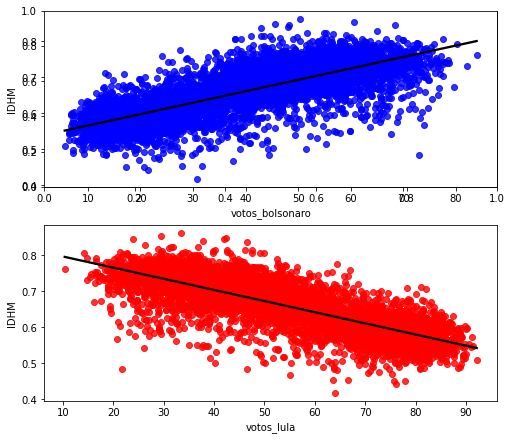

In [313]:
fig, ax = plt.subplots(2, figsize=(7, 6) ,layout="constrained")
p1= sns.regplot(x='votos_lula', y='IDHM', data=main_candidatos, color='red', line_kws={'color': 'black'})
fig.add_subplot(2, 1, 1) # two rows, one column, first plot
p2 = sns.regplot(x='votos_bolsonaro', y='IDHM', data=main_candidatos, color='blue', line_kws={'color': 'black'})

In [314]:
cor_map = main_candidatos[['IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R', 'votos_lula', 'votos_bolsonaro']]

<AxesSubplot: >

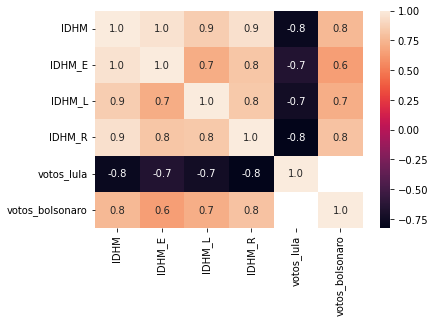

In [315]:
corr = cor_map.corr()
sns.heatmap(corr, annot=True, fmt=".1f")

In [316]:
main_candidatos['faixas_idhm'] = pd.cut(main_candidatos["IDHM"],[0,0.550, 0.699, 0.799,0.800], labels=['low', 'medium','high', 'very high'])

C:\Users\Lhayana\AppData\Local\Temp\ipykernel_21884\898542039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_candidatos['faixas_idhm'] = pd.cut(main_candidatos["IDHM"],[0,0.550, 0.699, 0.799,0.800], labels=['low', 'medium','high', 'very high'])


In [317]:
votos_lula = pd.DataFrame(main_candidatos.groupby('faixas_idhm', sort=True)['votos_lula'].mean())
votos_bolsonaro = pd.DataFrame(main_candidatos.groupby('faixas_idhm', sort=True)['votos_bolsonaro'].mean())

In [318]:
votos_por_idhm = pd.concat([votos_lula,votos_bolsonaro], join='outer',axis=1)
votos_por_idhm

,votos_lula,votos_bolsonaro
faixas_idhm,,
low,74.852310,20.401574
medium,61.399884,32.961175
high,38.690381,53.945083
very high,33.904107,55.937235


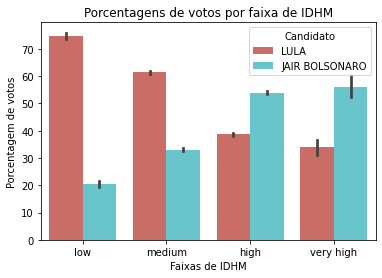

In [319]:
ax = sns.barplot(data=main_candidatos, x="faixas_idhm", y="PCT_VOTOS", hue="NM_URNA_CANDIDATO", palette = 'hls')
ax.set(xlabel='Faixas de IDHM', ylabel='Porcentagem de votos')

plt.title('Porcentagens de votos por faixa de IDHM')
ax.legend_.set_title('Candidato')
plt.show()

In [320]:
bigger_city = max(main_candidatos["population"])
main_candidatos['faixas_populacao'] = pd.cut(main_candidatos["population"], [0, 2000, 5000, 10000, 20000, 50000, 100000, 500000, bigger_city], labels=['Até 2.000 pessoas', '2.001 a 5.000 pessoas', '5.0001 a 10.000 pessoas', '10.001 a 20.000 pessoas', '20.001 a 50.000','50.001 a 100.000 pessoas', '100.001 a 500.000 pessoas', 'Mais de 500.000 pessoas'])

C:\Users\Lhayana\AppData\Local\Temp\ipykernel_21884\2307375460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_candidatos['faixas_populacao'] = pd.cut(main_candidatos["population"], [0, 2000, 5000, 10000, 20000, 50000, 100000, 500000, bigger_city], labels=['Até 2.000 pessoas', '2.001 a 5.000 pessoas', '5.0001 a 10.000 pessoas', '10.001 a 20.000 pessoas', '20.001 a 50.000','50.001 a 100.000 pessoas', '100.001 a 500.000 pessoas', 'Mais de 500.000 pessoas'])


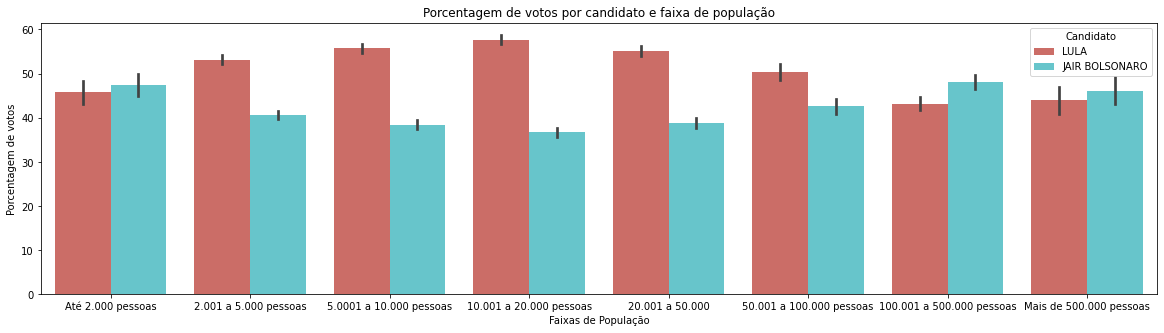

In [321]:
f, ax = plt.subplots(figsize=(20, 5))

ax = sns.barplot(data=main_candidatos, x="faixas_populacao", y="PCT_VOTOS", hue="NM_URNA_CANDIDATO", palette = 'hls')
ax.set(xlabel='Faixas de População', ylabel='Porcentagem de votos')
plt.title('Porcentagem de votos por candidato e faixa de população')
ax.legend_.set_title('Candidato')

c:\Users\Lhayana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


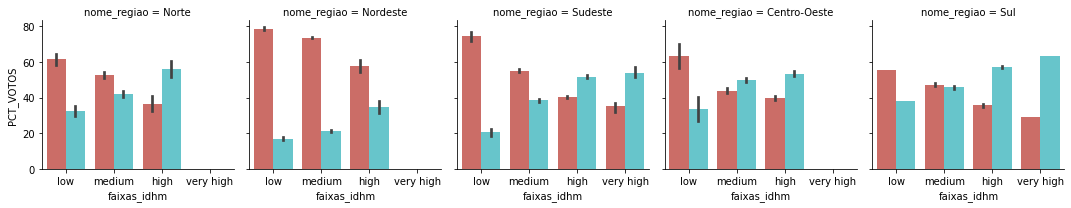

In [322]:
g = sns.FacetGrid(main_candidatos, col = "nome_regiao")
g.map(sns.barplot, "faixas_idhm", "PCT_VOTOS", hue=main_candidatos["NM_URNA_CANDIDATO"], palette = 'hls')

c:\Users\Lhayana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


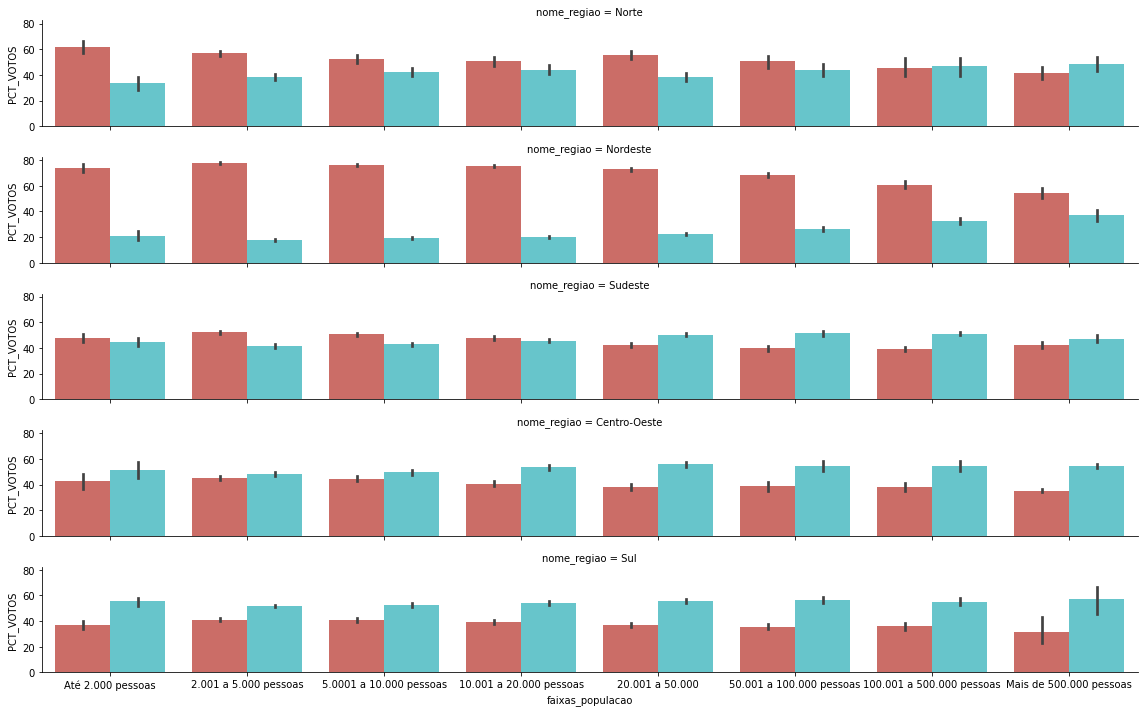

In [323]:
g = sns.FacetGrid(main_candidatos, row = "nome_regiao", aspect=8,height=2)
g.map(sns.barplot, "faixas_populacao", "PCT_VOTOS", hue=main_candidatos["NM_URNA_CANDIDATO"], palette = 'hls')

In [324]:
censo = pd.read_csv("data\censos.csv",encoding="Latin-1")

In [325]:
censo = censo.loc[ censo['ANO']==2010]

In [326]:
censo = censo[["city_ibge_code", 'EMP']]
# EMP -> % de empregadores

In [327]:
main_candidatos = pd.merge(main_candidatos, censo, on='city_ibge_code', how='left')

Text(0.5, 1.0, 'Porcentagens de votos por quantidade de empregadores (%)')

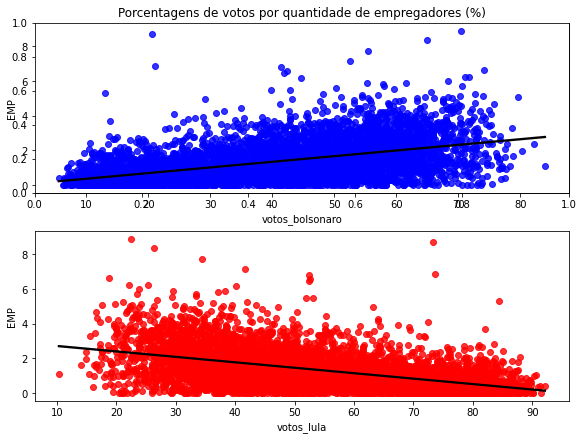

In [328]:
fig, ax = plt.subplots(2, figsize=(8, 6) , layout="constrained")
p1= sns.regplot(x='votos_lula', y='EMP', data=main_candidatos, color='red', line_kws={'color': 'black'})
fig.add_subplot(2, 1, 1)
p2 = sns.regplot(x='votos_bolsonaro', y='EMP', data=main_candidatos, color='blue', line_kws={'color': 'black'})
plt.title('Porcentagens de votos por quantidade de empregadores (%)')

### Relação entre evangélicos e vitórias do Bolsonaro

In [329]:
religiao = pd.read_csv("data\evangelicos-municipios.csv", skiprows=4, sep=";", skipfooter=20)
# fonte: tabela 2094 - SIDRA censo 2010

C:\Users\Lhayana\AppData\Local\Temp\ipykernel_21884\315832768.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  religiao = pd.read_csv("data\evangelicos-municipios.csv", skiprows=4, sep=";", skipfooter=20)


In [331]:
religiao.dtypes

Município     int64
Religião     object
Total        object
dtype: object

In [332]:
religiao['Total'] = religiao['Total'].replace('-', 0)
religiao['Total'] = religiao['Total'].replace('...', 0)
religiao['Total'] = religiao['Total'].astype('int32')

In [333]:
evangelicos = religiao.groupby('Município').sum()

In [334]:
main_candidatos = pd.merge(main_candidatos, evangelicos, left_on='city_ibge_code', right_on='Município',how='left')


In [335]:
main_candidatos = main_candidatos.rename(columns={"Total": "evangelicos"})

In [336]:
main_candidatos['evangelicos_pct'] = (main_candidatos['evangelicos']/main_candidatos['population'])*100

In [337]:
main_candidatos['evangelicos_pct'].max()

247.9120879120879

In [341]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 100]
bins.sort()
main_candidatos['faixas_evangelicos'] = pd.cut(main_candidatos["evangelicos_pct"], bins, labels=['0-5%', '5-10%', '10-15%', '15-20%','20-25%','25-30%', '30-35%', '35-40%', '40-50%', '50-60%', '+60%'])

In [343]:
filter = main_candidatos['evangelicos']<100
evangelicos_bolsonaro = main_candidatos[filter]

In [357]:
filter = (main_candidatos['votos_bolsonaro']>50)
evangelicos_bolsonaro = main_candidatos[filter]

In [370]:
evangelicos_bolsonaro = pd.DataFrame(evangelicos_bolsonaro.groupby('faixas_evangelicos', sort=True)['NM_MUNICIPIO'].count())

In [376]:
evangelicos_bolsonaro = evangelicos_bolsonaro.reset_index()

In [418]:
import plotly.express as px

fig = px.bar(evangelicos_bolsonaro, x="faixas_evangelicos", y="NM_MUNICIPIO", title="Quantidade de municípios em que o Bolsonaro venceu por porcentagem de evangélicos", labels={"NM_MUNICIPIO": "Nº de municípios", 'faixas_evangelicos': 'Pct. de evangélicos'})
fig.update_traces(textfont_size=9)
fig.update_layout(yaxis=dict(title='Qtd. de municípios em que o Bolsonaro venceu',title_font_size=13),
                  xaxis=dict(title='Porcentagem de evangélicos',title_font_size=13),
                  title_font_color="#343840", title_font_size=18,
                  title={'xanchor': 'center', 'x':0.5})
fig.show()